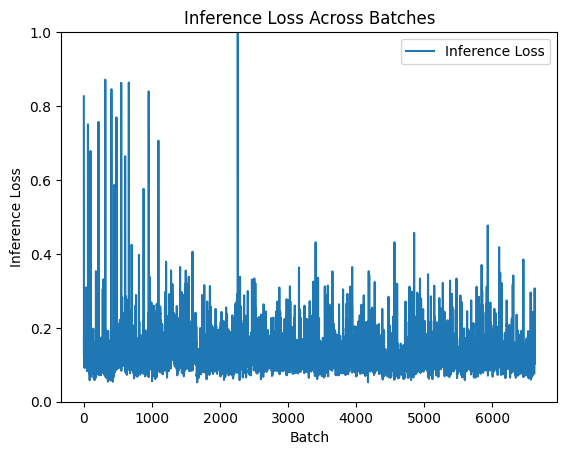

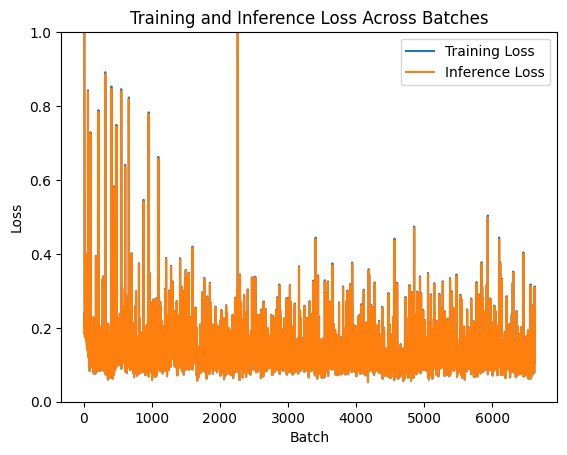

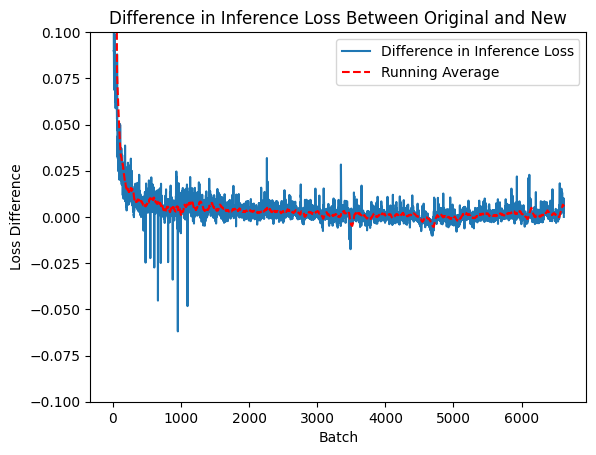

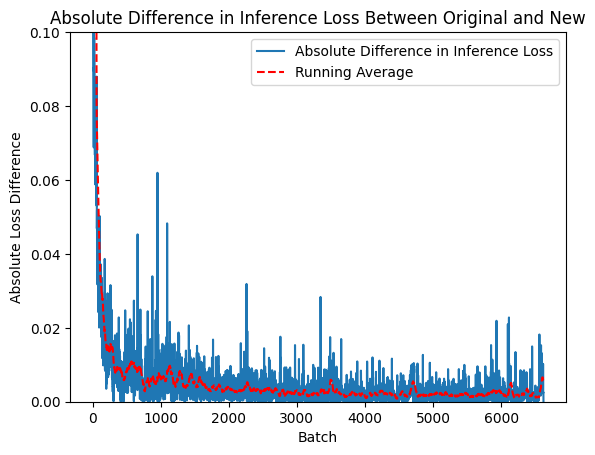

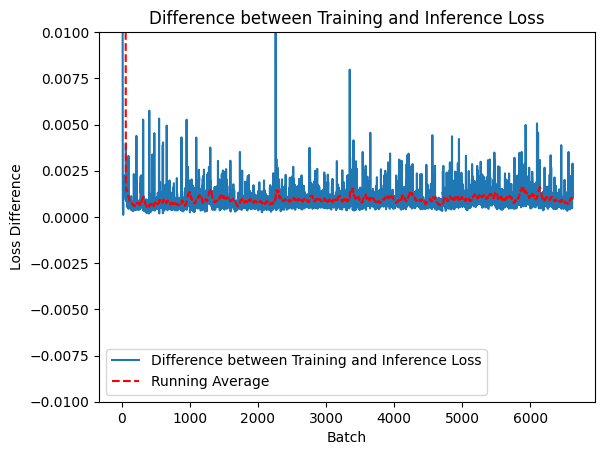

Analysis completed. Plots saved in: experiments/train_seq_just_DnD


In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

def load_config(config_path):
    with open(config_path, 'r') as cfg_file:
        return json.load(cfg_file)

def plot_inference_loss(all_inference_losses, save_dir):
    plt.figure()
    plt.plot(all_inference_losses, label='Inference Loss')
    plt.xlabel('Batch')
    plt.ylabel('Inference Loss')
    plt.title('Inference Loss Across Batches')
    plt.ylim(0, 1)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'inference_loss_plot.png'))
    plt.show()
    plt.close()

def plot_training_and_inference_loss(results, save_dir):
    df = pd.DataFrame(results)
    plt.figure()
    plt.plot(df['batch'], df['train_loss'], label='Training Loss')
    plt.plot(df['batch'], df['inference_loss'], label='Inference Loss')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Training and Inference Loss Across Batches')
    plt.ylim(0, 1)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'training_inference_loss_plot.png'))
    plt.show()
    plt.close()

def plot_inference_loss_difference(original_losses, new_losses, save_dir):
    differences = [orig - new for orig, new in zip(original_losses, new_losses)]
    running_avg_diff = pd.Series(differences).rolling(window=50).mean()
    abs_differences = [abs(diff) for diff in differences]
    running_avg_abs_diff = pd.Series(abs_differences).rolling(window=50).mean()
    
    # Difference Plot
    plt.figure()
    plt.plot(differences, label='Difference in Inference Loss')
    plt.plot(running_avg_diff, label='Running Average', linestyle='--', color='red')
    plt.xlabel('Batch')
    plt.ylabel('Loss Difference')
    plt.title('Difference in Inference Loss Between Original and New')
    plt.ylim(-0.1, 0.1)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'inference_loss_difference_plot.png'))
    plt.show()
    plt.close()

    # Absolute Difference Plot
    plt.figure()
    plt.plot(abs_differences, label='Absolute Difference in Inference Loss')
    plt.plot(running_avg_abs_diff, label='Running Average', linestyle='--', color='red')
    plt.xlabel('Batch')
    plt.ylabel('Absolute Loss Difference')
    plt.title('Absolute Difference in Inference Loss Between Original and New')
    plt.ylim(0, 0.1)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'inference_loss_abs_difference_plot.png'))
    plt.show()
    plt.close()

def plot_training_inference_loss_difference(results, save_dir):
    df = pd.DataFrame(results)
    differences = df['train_loss'] - df['inference_loss']
    running_avg_diff = differences.rolling(window=50).mean()
    
    plt.figure()
    plt.plot(differences, label='Difference between Training and Inference Loss')
    plt.plot(running_avg_diff, label='Running Average', linestyle='--', color='red')
    plt.xlabel('Batch')
    plt.ylabel('Loss Difference')
    plt.title('Difference between Training and Inference Loss')
    plt.ylim(-0.01, 0.01)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'training_inference_loss_difference_plot.png'))
    plt.show()
    plt.close()

def main():
    config_path = 'config.json'
    cfg = load_config(config_path)
    experiment_name = cfg['experiment_name']
    experiment_dir = os.path.join('experiments', experiment_name)

    results_path = os.path.join(experiment_dir, "batch_training_results.csv")
    if not os.path.exists(results_path):
        raise FileNotFoundError(f"Results CSV file not found at {results_path}")

    results = pd.read_csv(results_path).to_dict(orient='records')

    inference_results_path = os.path.join(experiment_dir, "new_inference_results.csv")
    if not os.path.exists(inference_results_path):
        raise FileNotFoundError(f"Inference results CSV file not found at {inference_results_path}")

    new_inference_results = pd.read_csv(inference_results_path).to_dict(orient='records')
    all_inference_losses = [result['inference_loss'] for result in new_inference_results]

    plot_inference_loss(all_inference_losses, experiment_dir)
    plot_training_and_inference_loss(results, experiment_dir)

    original_inference_losses = [result['inference_loss'] for result in results]
    plot_inference_loss_difference(original_inference_losses, all_inference_losses, experiment_dir)
    plot_training_inference_loss_difference(results, experiment_dir)

    print(f"Analysis completed. Plots saved in: {experiment_dir}")

if __name__ == "__main__":
    main()
